### Soft Voting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

X,y = datasets.make_moons(n_samples=500,noise=0.3,random_state=666)

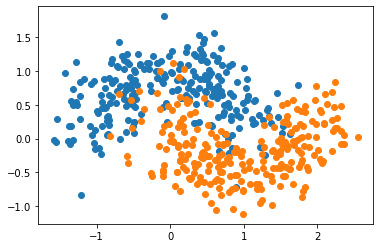

In [3]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

### Hard Voting Classifier

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [7]:
voting_clf = VotingClassifier(estimators=[
    ('log_clf',LogisticRegression()),
    ('svm_clf',SVC()),
    ('dt_clf',DecisionTreeClassifier(random_state=666))
],voting='hard')


In [8]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('log_clf', LogisticRegression()),
                             ('svm_clf', SVC()),
                             ('dt_clf',
                              DecisionTreeClassifier(random_state=666))])

In [9]:
voting_clf.score(X_test,y_test)

0.896

### Soft Voting Classifier

In [10]:
voting_clf2 = VotingClassifier(estimators=[
    ('log_clf',LogisticRegression()),
    ('svm_clf',SVC(probability=True)),
    ('dt_clf',DecisionTreeClassifier(random_state=666))
],voting='soft')

In [11]:
voting_clf2.fit(X_train,y_train)

VotingClassifier(estimators=[('log_clf', LogisticRegression()),
                             ('svm_clf', SVC(probability=True)),
                             ('dt_clf',
                              DecisionTreeClassifier(random_state=666))],
                 voting='soft')

In [12]:
voting_clf2.score(X_test,y_test)

0.88